# Exercise with A/B Testing

### Prompt

Let’s imagine you work on the For You Page at TikTok. Your team decides that instead of a heart button, they want to change it to star hoping that it will lead to a higher engagement/like rate. The product manager told you that the current conversion rate is about 6% on average throughout the year, and that the team would be happy with an increase of 3%, meaning that the new design will be considered a success if it raises the engagement rate to 9%.

Before rolling out the change, the team would be more comfortable testing it on a small number of users to see how it performs, so you suggest running an A/B test on a subset of the user base users.

In [66]:
# Packages imports
import numpy as np
import pandas as pd

# probability distributions & statistical functions
import scipy.stats as stats
# estimating statistical models
import statsmodels.stats.api as sms

import matplotlib.pyplot as plt
import seaborn as sns

#rounding function
from math import ceil

### Sample Size Calculation

In [67]:
# Calculate effect size based on our expected rates
effect_size = sms.proportion_effectsize(0.06, 0.09)

In [68]:
# Calculate sample size needed
required_n = sms.NormalIndPower().solve_power(
    effect_size,
    power=0.8,
    alpha=0.05,
    ratio=1
)
required_n = ceil(required_n)
required_n

1199

### Collecting and preparing the data

In [69]:
# Load the tiktok_data.csv into a dataframe

df = pd.read_csv('tiktok_data.csv')
df.head()

,user_id,timestamp,group,button,liked
0,767017,2017-01-12 22:58:15,control,star,0
1,793849,2017-01-23 22:36:11,treatment,star,0
2,905617,2017-01-20 14:12:19,treatment,star,0
3,746742,2017-01-23 11:38:30,control,heart,0
4,892356,2017-01-05 9:35:15,treatment,star,1


In [70]:
# Get the info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275781 entries, 0 to 275780
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    275781 non-null  int64 
 1   timestamp  275781 non-null  object
 2   group      275781 non-null  object
 3   button     275781 non-null  object
 4   liked      275781 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 10.5+ MB


- user_id: The ID of each user
- timestamp: Timestamp for the session
- group: Which group the user was assigned to for that session {control, treatment}
- button: Which button each user saw on that session {heart, star}
- liked: Whether the session ended in a like or not (binary, 0=not converted, 1=converted)

In [71]:
# Make sure all the control group are seeing the star button and viceversa
pd.crosstab(df['group'], df['button'])

# control   = 137,818 entries
# treatment = 137,963 entries

button,heart,star
group,,
control,136002,1816
treatment,1855,136108


CLEANING THE DF

In [72]:
# Removing the controls that were stars and treatments that were hearts
c_df = df.loc[df['group'] == 'control']
print(c_df.group.value_counts())
c_df

control    137818
Name: group, dtype: int64


,user_id,timestamp,group,button,liked
0,767017,2017-01-12 22:58:15,control,star,0
3,746742,2017-01-23 11:38:30,control,heart,0
6,913579,2017-01-24 9:11:39,control,heart,1
8,690284,2017-01-13 17:22:57,control,heart,0
12,710349,2017-01-11 22:24:44,control,heart,0
...,...,...,...,...,...
275770,850065,2017-01-17 11:57:19,control,heart,1
275771,880066,2017-01-04 5:47:41,control,heart,0
275772,871941,2017-01-07 9:48:25,control,heart,0
275774,886877,2017-01-04 8:34:18,control,heart,0


In [73]:
c_df = c_df.loc[c_df['button'] == 'heart']
print(c_df.group.value_counts())
c_df

control    136002
Name: group, dtype: int64


,user_id,timestamp,group,button,liked
3,746742,2017-01-23 11:38:30,control,heart,0
6,913579,2017-01-24 9:11:39,control,heart,1
8,690284,2017-01-13 17:22:57,control,heart,0
12,710349,2017-01-11 22:24:44,control,heart,0
13,677533,2017-01-23 17:48:50,control,heart,0
...,...,...,...,...,...
275770,850065,2017-01-17 11:57:19,control,heart,1
275771,880066,2017-01-04 5:47:41,control,heart,0
275772,871941,2017-01-07 9:48:25,control,heart,0
275774,886877,2017-01-04 8:34:18,control,heart,0


In [74]:
# Removing the controls that were stars and treatments that were hearts
t_df = df.loc[df['group'] == 'treatment']
print(t_df.group.value_counts())
t_df

treatment    137963
Name: group, dtype: int64


,user_id,timestamp,group,button,liked
1,793849,2017-01-23 22:36:11,treatment,star,0
2,905617,2017-01-20 14:12:19,treatment,star,0
4,892356,2017-01-05 9:35:15,treatment,star,1
5,773302,2017-01-12 8:29:50,treatment,star,0
7,736159,2017-01-06 1:50:21,treatment,star,0
...,...,...,...,...,...
275775,670432,2017-01-17 21:30:42,treatment,star,0
275777,794969,2017-01-11 7:19:10,treatment,star,0
275778,679368,2017-01-18 11:54:14,treatment,star,0
275779,742454,2017-01-02 15:16:33,treatment,star,0


In [75]:
t_df = t_df.loc[t_df['button'] == 'star']
print(t_df.group.value_counts())
t_df

treatment    136108
Name: group, dtype: int64


,user_id,timestamp,group,button,liked
1,793849,2017-01-23 22:36:11,treatment,star,0
2,905617,2017-01-20 14:12:19,treatment,star,0
4,892356,2017-01-05 9:35:15,treatment,star,1
5,773302,2017-01-12 8:29:50,treatment,star,0
7,736159,2017-01-06 1:50:21,treatment,star,0
...,...,...,...,...,...
275775,670432,2017-01-17 21:30:42,treatment,star,0
275777,794969,2017-01-11 7:19:10,treatment,star,0
275778,679368,2017-01-18 11:54:14,treatment,star,0
275779,742454,2017-01-02 15:16:33,treatment,star,0


In [76]:
# MERGE c_df + t_df to create df_fin

In [77]:
# Merge them
df_fin = c_df.merge(t_df, how='outer') 
print(df_fin.group.value_counts())
df_fin

treatment    136108
control      136002
Name: group, dtype: int64


,user_id,timestamp,group,button,liked
0,746742,2017-01-23 11:38:30,control,heart,0
1,913579,2017-01-24 9:11:39,control,heart,1
2,690284,2017-01-13 17:22:57,control,heart,0
3,710349,2017-01-11 22:24:44,control,heart,0
4,677533,2017-01-23 17:48:50,control,heart,0
...,...,...,...,...,...
272105,670432,2017-01-17 21:30:42,treatment,star,0
272106,794969,2017-01-11 7:19:10,treatment,star,0
272107,679368,2017-01-18 11:54:14,treatment,star,0
272108,742454,2017-01-02 15:16:33,treatment,star,0


In [80]:
# Check that no users have been sampled multiple times 
session_counts = df_fin['user_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()
multi_users

630732    1
852725    1
688901    1
690948    1
701187    1
         ..
744897    1
742848    1
634271    1
632222    1
630836    1
Name: user_id, Length: 272108, dtype: int64

In [79]:
# If there are users who have been sampled multiple times, remove them from the dataframe

print("Group Value Count on df before multi users removal")
print(df_fin.group.value_counts())
print()

users_to_drop = session_counts[session_counts > 1].index

df_fin = df_fin[~df_fin['user_id'].isin(users_to_drop)]

print("Group Value Count on df after multi users removal")
print(df_fin.group.value_counts())

Group Value Count on df before multi users removal
treatment    136108
control      136002
Name: group, dtype: int64

Group Value Count on df after multi users removal
treatment    136106
control      136002
Name: group, dtype: int64


#### Now that our DataFrame is nice and clean, we can proceed and sample n=1199 entries for each of the groups. We can use pandas' DataFrame.sample() method to do this, which will perform Simple Random Sampling for us.

In [23]:
# Perform simple random sampling to split the data into control and treatment
control_sample = df_fin[df_fin['group'] == 'control'].sample(n=required_n, random_state=23)
treatment_sample = df_fin[df_fin['group'] == 'treatment'].sample(n=required_n, random_state=23)

In [25]:
# Create one table called ab_test that has both the cleaned control and treatment data
ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)
print(ab_test.group.value_counts())
ab_test

control      1199
treatment    1199
Name: group, dtype: int64


,user_id,timestamp,group,button,liked
0,942670,2017-01-03 20:34:05,control,heart,0
1,935658,2017-01-18 9:00:42,control,heart,0
2,851896,2017-01-19 21:26:09,control,heart,0
3,760588,2017-01-06 5:03:46,control,heart,0
4,872378,2017-01-09 2:06:17,control,heart,0
...,...,...,...,...,...
2393,854156,2017-01-04 3:11:11,treatment,star,0
2394,651765,2017-01-03 19:09:32,treatment,star,0
2395,684661,2017-01-07 21:03:58,treatment,star,0
2396,892905,2017-01-19 11:01:45,treatment,star,0


### Analysis Visualization

In [28]:
# Find the like rate by group
conv_rates = ab_test.groupby('group')['liked']

# Find the Std. deviation of the proportion
std_p = lambda x: np.std(x, ddof=0)

# Find the Std. error of the proportion (std / sqrt(n))
se_p = lambda x: stats.sem(x, ddof=0)

# Calculate the final like rate
conv_rates = conv_rates.agg([np.mean, std_p, se_p])
conv_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']

conv_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
group,,,
control,0.113,0.316,0.009
treatment,0.123,0.329,0.009


Text(0, 0.5, 'Converted (proportion)')

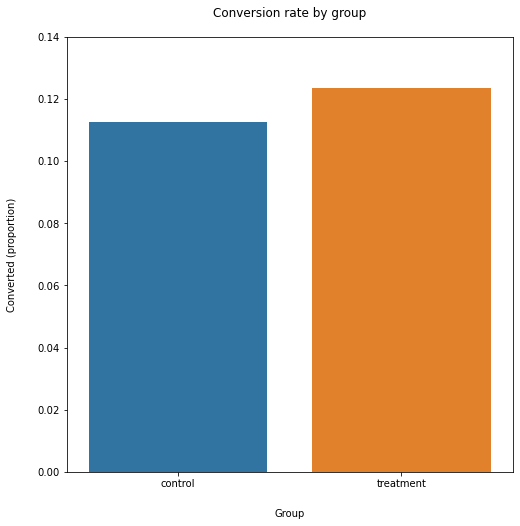

In [40]:
# Plot the like rate by group on a bar plot

plt.figure(figsize=(8,8))

sns.barplot(x=ab_test['group'], y=ab_test['liked'], ci=False)

plt.ylim(0, 0.14)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=20)
plt.ylabel('Converted (proportion)', labelpad=20)

# Conversion rates are similar

### Testing for Stat Sig

In [59]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# Get the like count for both control and treatment groups
control_results = ab_test[ab_test['group'] == 'control']['liked']
treatment_results = ab_test[ab_test['group'] == 'treatment']['liked']

c_likes = control_results.sum()
print("Control Like Count = ", c_likes)

t_likes = treatment_results.sum()
print("Treatment Like Count = ", t_likes)

print()

# Get the number of samples in both groups
n_con = control_results.count()
n_treat = treatment_results.count()
nobs = [n_con, n_treat]
print("Sample Size of Both: ", nobs)

print()

# Sum up the number of successes (likes) in both groups
successes = [c_likes, t_likes]
print("Likes of Both: ", successes)

Control Like Count =  135
Treatment Like Count =  148

Sample Size of Both:  [1199, 1199]

Likes of Both:  [135, 148]


In [61]:
# Find the z statistic and p value for proportions based on normal ztest
z_stat, pval = proportions_ztest(successes, nobs=nobs)

# Find the confidence intervals for each test grou
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

In [62]:
# print z statistic
print(f'z-statistic: {z_stat:.2f}')

# print p-value
print(f'p-value: {pval:.3f}')

# print ci 95% for control group
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')

# print ci 95% for treatment group
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z-statistic: -0.82
p-value: 0.411
ci 95% for control group: [0.095, 0.130]
ci 95% for treatment group: [0.105, 0.142]


### Were the results signficant? 

Ans: No they were not. The p-value: .411 > .05. It looks like the confidence intervals for the control and treatment groups overlap quite a bit here as well. 

### What would you advise the engineering team to do moving forward?

Ans: The null hypothesis cannot be rejected. The button change was not stat sig. Maybe try a different shape for the like button and see if that will perform better or just keep the like button the way it is.  